<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2
## Boxplot - Median value of owner-occupied homes

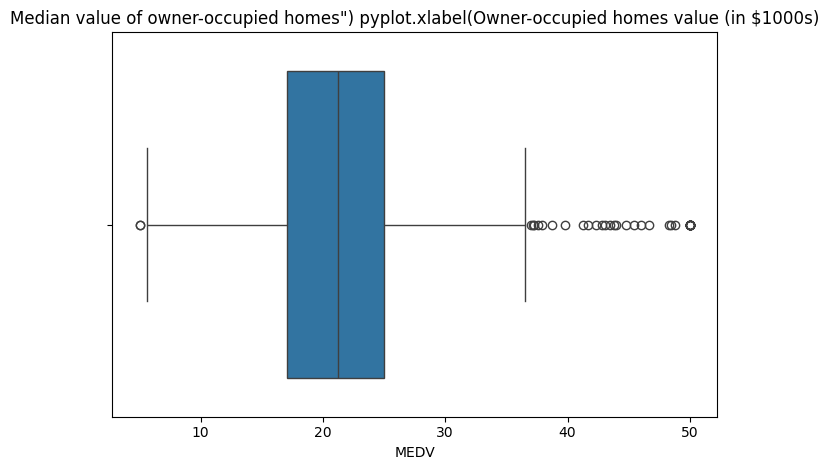

This box plot shows the median value distrubution of owner-occupied homes. Here we notice that there are many outliers above the $37000s value which is represented by the circular outlines outside of the box plot region


In [6]:
sns.boxplot(
x = 'MEDV',
data=boston_df,
orient = 'h')
pyplot.title('Median value of owner-occupied homes") pyplot.xlabel(Owner-occupied homes value (in $1000s)')
pyplot.tight_layout()
pyplot.show()
print('This box plot shows the median value distrubution of owner-occupied homes. Here we notice that there are many outliers above the $37000s value which is represented by the circular outlines outside of the box plot region')


## Barplot - Charles River Variable

In [7]:
charles_river_df = boston_df[['Unnamed: 0', 'CHAS']].groupby(['CHAS']).describe().reset_index()
charles_river_df = boston_df.groupby(['CHAS']).count().reset_index()
charles_river_df = charles_river_df[['CHAS', 'Unnamed: 0']].rename(columns = {'Unnamed: 0': "count"})
charles_river_df


,CHAS,count
0,0.0,471
1,1.0,35


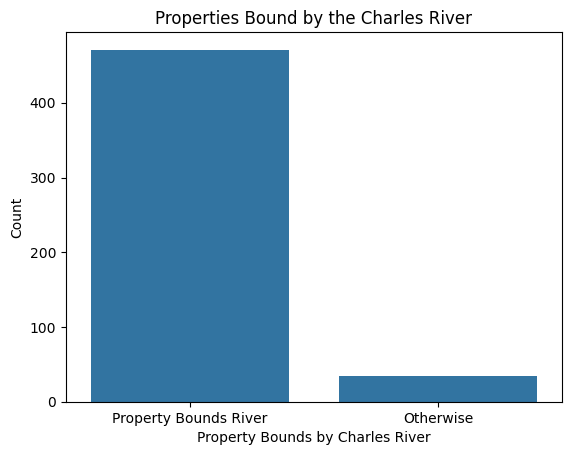

This bar plot shows the number of properties that are bound by the charles river and the number of properties in the area not bound by the river


In [8]:
sns.barplot(x = charles_river_df['CHAS'],
y = charles_river_df['count'])
pyplot.title('Properties Bound by the Charles River')
pyplot.xlabel('Property Bounds by Charles River')
pyplot.xticks(ticks = [0.0,1.0], labels = ['Property Bounds River', 'Otherwise'])
pyplot.ylabel('Count')
pyplot.show()

print('This bar plot shows the number of properties that are bound by the charles river and the number of properties in the area not bound by the river')


## Boxplot - Median value of homes by proportion of properties built prior to 1940


In [9]:
boston_df['age_group'] = boston_df.apply(
    lambda x: "<= 35" if x['AGE'] <= 35
    else '>= 70' if x['AGE'] >= 70
    else '35-70',
    axis=1
)


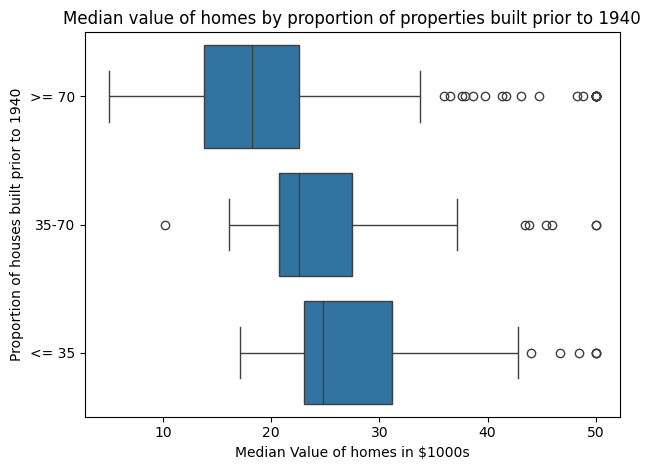

This box plot shows the median value of homes by the proportion of properties built prior to 1940. We see that areas where there are a higher proportion of old houses i.e. more houses built prior to 1940 have a lower median value.


In [27]:
sns.boxplot(
x = 'MEDV',
y = 'age_group',
data = boston_df,
orient = 'h',
order = ['>= 70','35-70','<= 35'])
pyplot.title('Median value of homes by proportion of properties built prior to 1940') 
pyplot.xlabel('Median Value of homes in $1000s') 
pyplot.ylabel('Proportion of houses built prior to 1940') 
pyplot.tight_layout()
pyplot.show()

print('This box plot shows the median value of homes by the proportion of properties built prior to 1940. We see that areas where there are a higher proportion of old houses i.e. more houses built prior to 1940 have a lower median value.')

## Scatter plot - Nitrix Oxide Concentration vs Proportion of non-retail business acres per town


This scatter plot shows a slight positive correlation where a higher proportion of non-retail business tends to have a higher nitrix oxide concentration


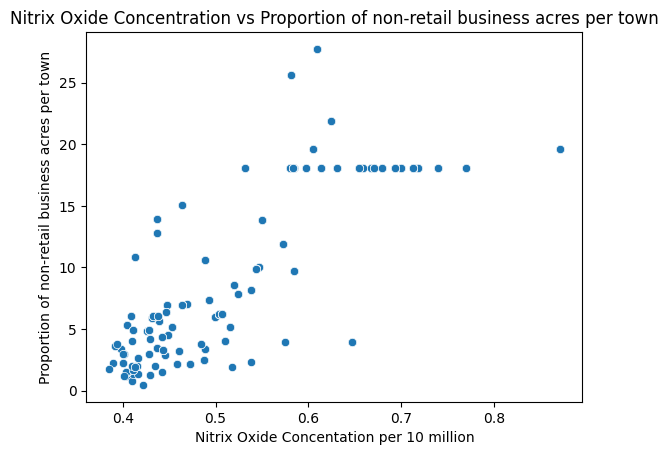

In [28]:
sns.scatterplot(x = 'NOX',
y = 'INDUS',
data = boston_df)
pyplot.title('Nitrix Oxide Concentration vs Proportion of non-retail business acres per town') 
pyplot.xlabel('Nitrix Oxide Concentation per 10 million')
pyplot.ylabel('Proportion of non-retail business acres per town')

print('This scatter plot shows a slight positive correlation where a higher proportion of non-retail business tends to have a higher nitrix oxide concentration')

## Histogram - Ration of Pupuls to Teachers

Text(0, 0.5, 'Frequency')

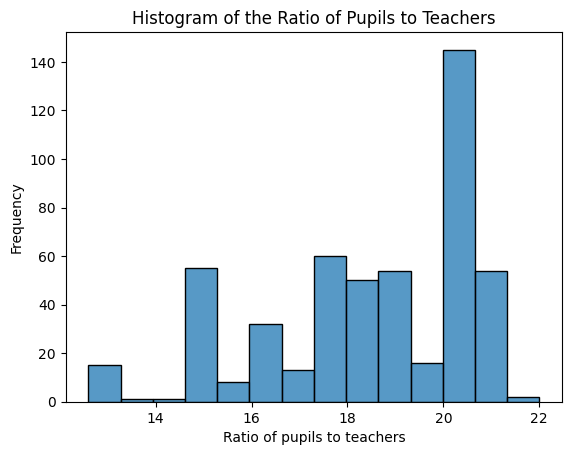

In [12]:
sns.histplot(data=boston_df, x='PTRATIO')
pyplot.title('Histogram of the Ratio of Pupils to Teachers') 
pyplot.xlabel('Ratio of pupils to teachers') 
pyplot.ylabel('Frequency')


# Task 3

In [18]:
# 1.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Null hypothesis - There is no signifcant different in the median value of houses bounded by the charles river (Med1 = Med2)
# Alternate hypothesis - There is a signifcant different in the median value of houses bounded by the charles river (Med1 != Med2)

chas_is_0 = boston_df[boston_df['CHAS'] ==  0]['MEDV']
chas_is_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = scipy.stats.f_oneway(chas_is_0, chas_is_1)

print(t_stat, p_value)

if p_value < 0.05:
    print("We reject the null hypothesis as there is a significant difference in the median value of homes bounded by the charles river")
else:
    print("There is insufficient evidence to reject the null hypothesis that there is a significant difference in the median value of homes bounded by the charles river")

15.971512420371955 7.390623170520815e-05
We reject the null hypothesis as there is a significant difference in the median value of homes bounded by the charles river


In [21]:
#2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Null Hypothesis - There is no difference in the medican value of houses for each proportion of properties built prior to 1940
# Alternate Hypothesis - There is a difference in the medican value of houses for each proportion of properties built prior to 1940

MEDV_lessthan_35 = boston_df[boston_df['age_group'] == '<= 35']['MEDV']
MEDV_between_35_70 = boston_df[boston_df['age_group']== '35-70']['MEDV']
MEDV_morethan_70 = boston_df[boston_df['age_group']== '>= 70']["MEDV"]

t_stat, p_value = scipy.stats.f_oneway(MEDV_lessthan_35, MEDV_between_35_70, MEDV_morethan_70)

print(t_stat, p_value)

if p_value < 0.05:
    print("We reject the null hypothesis as there is a significant difference in the medican value of houses for each proportion of properties built prior to 1940") 
else:
    print("There is insufficient evidence to reject the null hypothesis that there is a significant difference in the medican value of houses for each proportion of properties built prior to 1940")


36.40764999196599 1.7105011022702984e-15
We reject the null hypothesis as there is a significant difference in the medican value of houses for each proportion of properties built prior to 1940


In [22]:
# 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business
# Null Hypothesis - Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town
# Alternate Hypothesis - Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

t_stat, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(t_stat, p_value)

if p_value < 0.05:
    print( "We reject the null hypothesis as there is a significant evidence to show that Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town") 
else:
    print("There is insufficient evidence to reject the null hypothesis that there is a significant evidence to show that Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town")


0.7636514469209192 7.913361061210442e-98
We reject the null hypothesis as there is a significant evidence to show that Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town


In [25]:
# 4.What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# Null Hypothesis - There is no impact of an additional weighted distance to the five boston employment centres on the median value of owner occupied homes
# Alternate Hypothesis - These is an impact of an additional weighted distance to the five boston employment centres on the median value of owner occupied homes

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        10:52:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
print('We reject the null hypothesis as the p value is less than alpha thus there is significant evidence that is an impact of an additional weighted distance to the five boston employment centres ont he median value of owner occupied homes')


We reject the null hypothesis as the p value is less than alpha thus there is significant evidence that is an impact of an additional weighted distance to the five boston employment centres ont he median value of owner occupied homes
